## Project 1
##### Ebru Dagdelen
##### 10/11/2023-10/20/2023
Project 1: Data Analysis with Python

Our goal for this notebook is to analyze the survey dataset to answer the following questions.

1. From those who answered likely to take another computing class(4 or 5) what is the distribution of the majors/departments they are enrolled as?

2. What are the demographic distribution of the data?(Age, Race/Ethinicity, Gender)

3. What percent of students were engaged with CCM(attended an event at CCM) prior to enrolling to CCM?

4. What percent of students received information about the computing programs/classes at CCM? What is the top information source?

5. What percent of students chose a computing major/certification as their first major? What are the distributions of previous CCM programs for those who changed to a computing major/certification?

In [1]:
#Import modules we might use.
import pandas as pd
import math
import statistics as stat
import matplotlib.pyplot as plt

In [2]:
#Bring in the CSV file.
datafilecomputing = "/Users/ebrushka/Desktop/python/homeworks/project-1/cleaned_computingsurvey_data.csv"
surveydata = pd.read_csv(datafilecomputing)

In [3]:
surveydata.head() #The index came in too as a new column so lets drop that.

,Unnamed: 0,Major,hs_councelor,teacher,IT_website,admissions,CCM_advisor,employer,ccmworforce,njworkforce,other,gender,race/ethnicity,age,intereset_rating,first_major,attended_event,received_info
0,0,Computer Science,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Man,White/Caucasian,19-20,NaN,First Choice,Yes,Yes
1,1,Computer Science,No,No,Yes,No,Yes,No,No,No,No,Man,White/Caucasian,25-34,NaN,First Choice,Yes,Yes
2,2,Liberal Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,White/Caucasian,19-20,1.0,NaN,Yes,No
3,3,Computer Science,Yes,Yes,No,Yes,No,No,No,No,No,Man,Asian,18 and younger,NaN,First Choice,Yes,Yes
4,4,Information Technology,No,No,No,No,No,No,No,No,No,Man,White/Caucasian,25-34,NaN,First Choice,No,No


In [4]:
surveydata = surveydata.drop('Unnamed: 0', axis = 1)

In [5]:
surveydata.tail()

,Major,hs_councelor,teacher,IT_website,admissions,CCM_advisor,employer,ccmworforce,njworkforce,other,gender,race/ethnicity,age,intereset_rating,first_major,attended_event,received_info
448,Computer Science,No,No,No,No,No,No,No,No,No,Man,Multi-Racial,19-20,NaN,Health Sciences,No,No
449,Computer Science,No,No,No,No,No,No,No,No,No,Man,Hispanic or Latino,21-24,NaN,First Choice,Yes,No
450,Computer Science,Don't recall,Don't recall,Yes,Don't recall,No,No,No,No,Yes,Man,Multi-Racial,18 and younger,NaN,Math & Science,No,Yes
451,Computer Science,No,No,Yes,Yes,No,No,No,No,Don't recall,Man,White/Caucasian,19-20,NaN,First Choice,Yes,Yes
452,Game Development,Yes,No,No,No,Yes,No,No,No,No,Man,Black/African American,18 and younger,NaN,First Choice,Yes,Yes


In [6]:
surveydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Major             453 non-null    object 
 1   hs_councelor      335 non-null    object 
 2   teacher           335 non-null    object 
 3   IT_website        335 non-null    object 
 4   admissions        335 non-null    object 
 5   CCM_advisor       335 non-null    object 
 6   employer          335 non-null    object 
 7   ccmworforce       335 non-null    object 
 8   njworkforce       335 non-null    object 
 9   other             335 non-null    object 
 10  gender            453 non-null    object 
 11  race/ethnicity    453 non-null    object 
 12  age               453 non-null    object 
 13  intereset_rating  118 non-null    float64
 14  first_major       332 non-null    object 
 15  attended_event    453 non-null    object 
 16  received_info     453 non-null    object 
dt

In [7]:
surveydata.columns

Index(['Major', 'hs_councelor', 'teacher', 'IT_website', 'admissions',
       'CCM_advisor', 'employer', 'ccmworforce', 'njworkforce', 'other',
       'gender', 'race/ethnicity', 'age', 'intereset_rating', 'first_major',
       'attended_event', 'received_info'],
      dtype='object')

### 1. Answer the question:  From those who answered likely to take another computing class(4 or 5) what is the distribution of the majors/departments they are enrolled as?

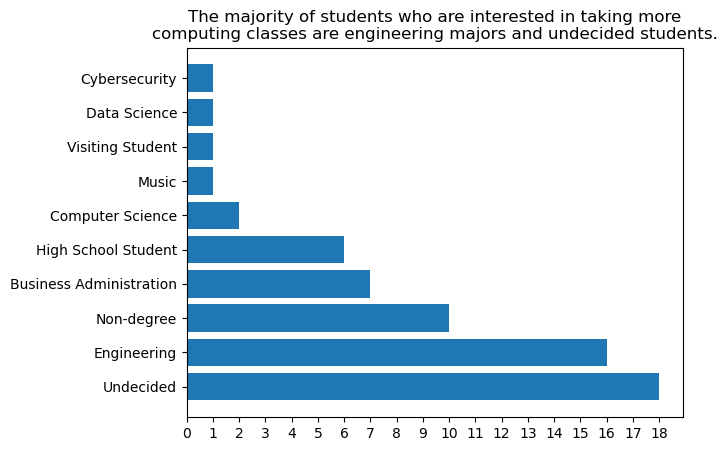

In [8]:
#Subset the rows with only students who are likely to take a computing class
question1 = surveydata[(surveydata['intereset_rating'] == 4) | (surveydata['intereset_rating'] == 5)]

#Let's make a bar chart of the majors. We first have to get the major counts 
major_counts = question1['Major'].value_counts()
plt.barh(major_counts.index,major_counts)
plt.title('The majority of students who are interested in taking more\ncomputing classes are engineering majors and undecided students.')
# Set the x-axis ticks to be integers
plt.xticks(range(int(max(major_counts) + 1)))
plt.show() #hides all the 

### 2. Answer the question:  What are the demographic distribution of the data?(Age, Race/Ethinicity, Gender)

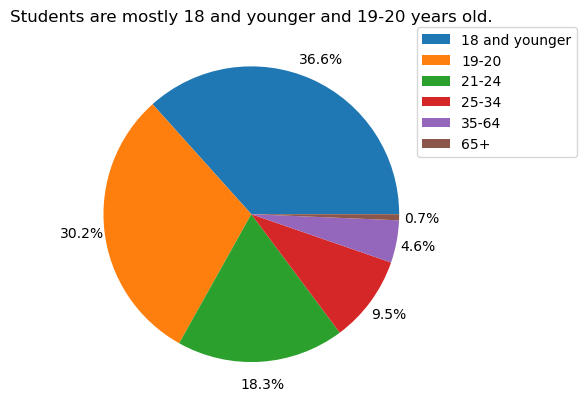

In [9]:
#Create column with age counts.
age_counts = surveydata['age'].value_counts()

#Make pie chart.
plt.pie(age_counts, labels=None, autopct='%1.1f%%', pctdistance=1.15)
plt.title('Students are mostly 18 and younger and 19-20 years old.')
plt.legend(age_counts.index, bbox_to_anchor = (1.4,1.025))

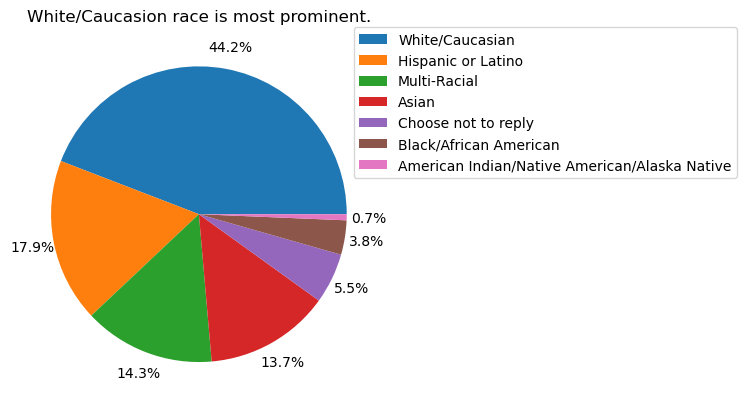

In [10]:
#Create column with race/ethnicity counts.
ethnicity_counts = surveydata['race/ethnicity'].value_counts()

#Make pie chart.
plt.pie(ethnicity_counts, labels=None, autopct='%1.1f%%', pctdistance=1.15)
plt.title('White/Caucasion race is most prominent.')
plt.legend(ethnicity_counts.index, bbox_to_anchor = (0.9,1.025))

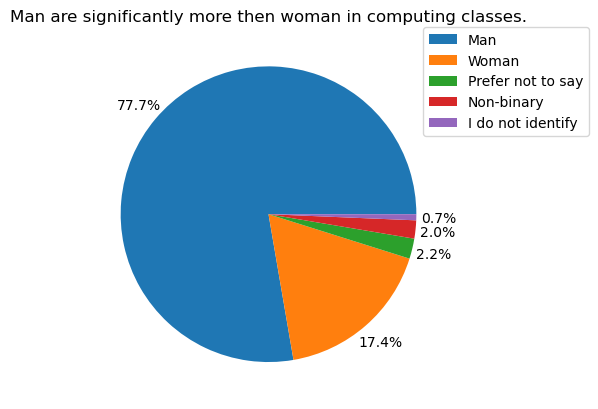

In [11]:
#Create column with gender counts.
gender_counts = surveydata['gender'].value_counts()

#Make pie chart.
plt.pie(gender_counts, labels=None, autopct='%1.1f%%', pctdistance=1.15)
plt.title('Man are significantly more then woman in computing classes.')
plt.legend(gender_counts.index, bbox_to_anchor = (0.9,1.025))

### 3. Answer the question:  What percent of students were engaged with CCM(attended an event at CCM) prior to enrolling to CCM?

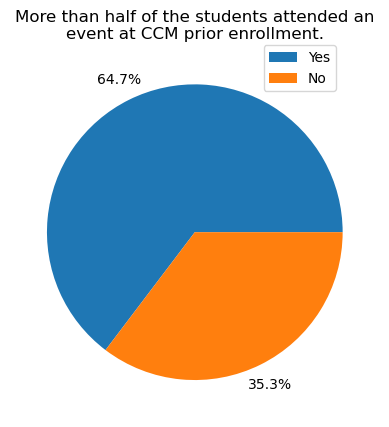

In [12]:
#Create column with engagement counts.
event_counts = surveydata['attended_event'].value_counts()

#Make pie chart.
plt.pie(event_counts, labels=None, autopct='%1.1f%%', pctdistance=1.15)
plt.title('More than half of the students attended an\nevent at CCM prior enrollment.')
plt.legend(event_counts.index, bbox_to_anchor = (0.9,1.025))

### 4. Answer the question:  What percent of students received information about the computing programs/classes at CCM? What is the top information source?

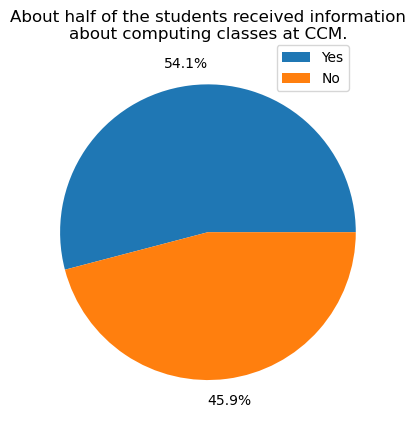

In [13]:
#Create column with information counts.
info_counts = surveydata['received_info'].value_counts()

#Make pie chart.
plt.pie(info_counts, labels=None, autopct='%1.1f%%', pctdistance=1.15)
plt.title('About half of the students received information\nabout computing classes at CCM.')
plt.legend(info_counts.index, bbox_to_anchor = (0.9,1.025))

Text(0.5, 0, 'Count of "Yes"')

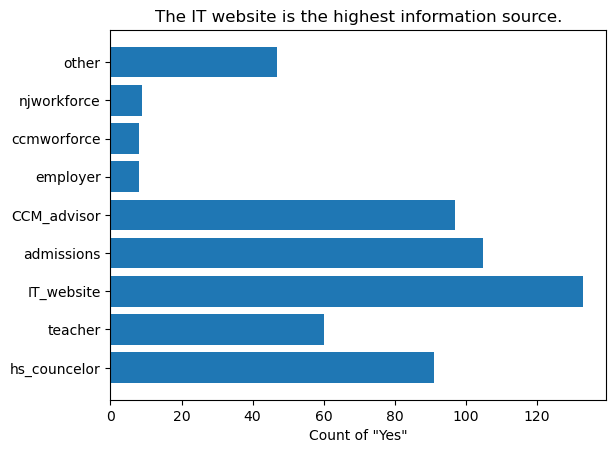

In [14]:
#get "Yes" counts for each column and make graph for the counts
yes_counts = {
    'hs_councelor': (surveydata['hs_councelor'] == 'Yes').sum(),
    'teacher': (surveydata['teacher'] == 'Yes').sum(),
    'IT_website': (surveydata['IT_website'] == 'Yes').sum(),
    'admissions': (surveydata['admissions'] == 'Yes').sum(),
    'CCM_advisor': (surveydata['CCM_advisor'] == 'Yes').sum(),
    'employer': (surveydata['employer'] == 'Yes').sum(),
    'ccmworforce': (surveydata['ccmworforce'] == 'Yes').sum(),
    'njworkforce': (surveydata['njworkforce'] == 'Yes').sum(),
    'other': (surveydata['other'] == 'Yes').sum()
}

keys = list(yes_counts.keys())
values = list(yes_counts.values())
# Create a bar chart for "Yes" counts of each category
plt.barh(keys, values)
plt.title('The IT website is the highest information source.')
plt.xlabel('Count of "Yes"')

### 5. Answer the question:  What percent of students chose a computing major/certification as their first major? What are the distributions of previous CCM programs for those who changed to a computing major/certification?

Text(0.5, 1.0, 'The majority of students chose a computing major as their first choice.')

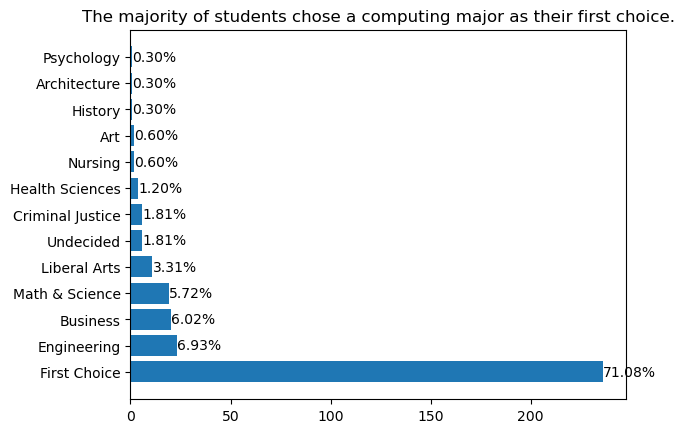

In [15]:
#Let's make a bar chart of the first majors. We first have to get the first major counts 
fmajor_counts = surveydata['first_major'].value_counts()
plt.barh(fmajor_counts.index,fmajor_counts)

# Add percentages to the end of each bar
count_non_nan = surveydata['first_major'].count()
for index, value in enumerate(fmajor_counts):
    percentage = (value / count_non_nan) * 100   
    plt.text(value, index, f'{percentage:.2f}%', va='center')
    
plt.title('The majority of students chose a computing major as their first choice.')